# This script demonstrates Building a digit classifier

# Name : Eun-Yeong Jeon

# Student ID : 20153334

## github : https://github.com/Eun0/Assignment

# Import packages for plotting graphs and manipulating data :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define normalize(data) function :

Normalize the values of the input data to be [0,1]

In [2]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# Define distance(x,y) function :

Compute distance between two vectors x and y

In [3]:
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# Load train and test data :

In [4]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# Make a matrix each column of which represents an images in a vector form :

In [5]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# Plot first 150 images out of 10,000 with their labels :

(784, 60000)


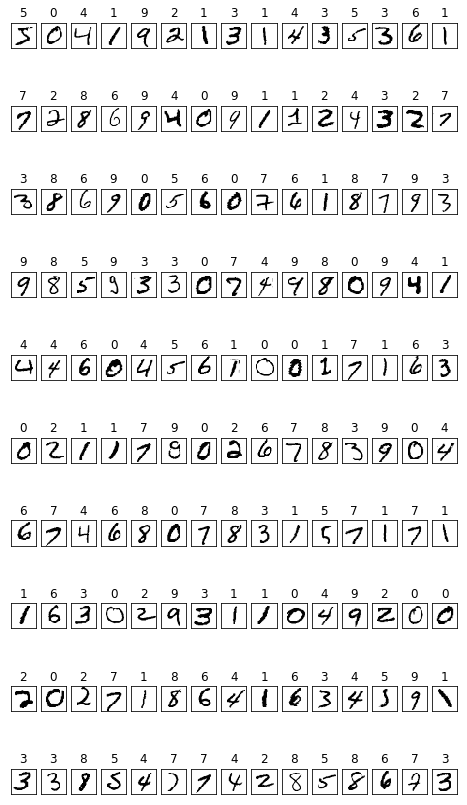

In [6]:
f1 = plt.figure(1,figsize=(8,15))

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
    
print(list_image_train.shape)
plt.show()

# Define make_blabel(list_label,digit) function :

- Parameter : list_label (numpy.ndarray)

  list_label : original label of data
  

- Return : blabel (numpy.ndarray)

  blabel : vectors which is obtained by applying our rule to list_label



Make vector which contains binary label(1 or -1) according to the list_label

we set label as below

label = $ \begin{cases}
 +1 & , x=digit \\ 
-1 & , otherwise 
\end{cases}$

In [7]:
def make_blabel(list_label,digit):
    
    blabel_digit=np.ones_like(list_label)
    
    blabel_digit[list_label!=digit]=-1
    
    return blabel_digit

# Make binary label for each digit :

In [8]:
# Make binary label for each digit in training data

blabel_train=[]
for i in range(10):
    blabel_train.append(make_blabel(list_label_train,i))



# Make binary label for each digit in test data

blabel_test=[]
for i in range(10):
    blabel_train.append(make_blabel(list_label_test,i))


# How construct a model :

we use a model $\tilde{f}(x;\theta)=\theta_{1}f_1(x)+\theta_2f_2(x)+...+\theta_pf_p(x)$ 

Let $f_i$ be a feature function

s.t. $f_i(x)=r_i^Tx$ where $r_i \sim N(0,\sigma)$ 

Find an optimal set of ($\theta_1,...,\theta_p$) by least square approximate solution

Return the optimal set of $\theta's$ and the model

********** How to find $\theta's$ **********

In matrix form,

$x_j$ = j-th data of x

$f_{ij}$ = $f_i(x_j)$,

$y$ = blabel vector , i-th element means label of i-th data 

$A=\begin{pmatrix}
 f_{11}&  f_{21}&  ....&  f_{p1}& \\ 
 f_{12}&  f_{22}&  ....&  f_{p2}& \\ 
 :&  :&  :&  :& \\ 
 :&  :&  :&  :& \\ 
 f_{1n}&  f_{2n}&  ....&  f_{pn}& 
\end{pmatrix}$ 

we can write the model

$\tilde{f}=A\theta$

Then a optimal set of theta is as below

$\theta=(A^TA)^{-1}A^Ty$


********** CAUTION **********

$(A^TA)^{-1}A^Ty$ has exactly one solution if $(A^TA)$ is non-singular

In case $(A^TA)$ is singular, ( we can't compute $(A^TA)^{-1}$ )  

compute pseudo-inverse of $(A^TA)$ instead 




# Define feature_func(ri_t,x) :

$f_i(x)=r_i^Tx$ where $r_i \sim N(0,\sigma)$ $r_i\in R^{784}$

The parameter ri_t is $r_i^T$


In [9]:
def feature_func(ri_t,x):
    return np.matmul(ri_t,x)

# Define find_theta(x,y,p,r) function :

- Parameters : x (numpy.ndarray), y (numpy.ndarray), p (int), r (numpy.ndarray)

  x : N data matrix

  y : N data's blabel

  p : length of a data
  
  r : matrix of random vectors drawn from a normal distribution

  so x is (N x p) matrix ,and y is (N x 1) vector
  

- Returns : theta (numpy.ndarray)

  theta : an optimal set of our model's coefficient according to x



In [10]:
def find_theta(x,y,p,r):
    
    # Define A matrix
    a_mat=np.array([[feature_func(r[i],x[:,j]) for i in range(p)] for j in range(x.shape[1])])

    gram=np.matmul(np.transpose(a_mat),a_mat)

    # Find theta using pinv
    '''if(np.linalg.matrix_rank==gram.shape[0]):
        left=np.linalg.inv(gram)
    else:
        left=np.linalg.pinv(gram)'''
    
    # Find theta using svd method
    u,s,vt=np.linalg.svd(gram,full_matrices=True)
    
    ut=np.transpose(u)
    v=np.transpose(vt)
    
    ss=np.zeros_like(gram)
    
    for i in range(ss.shape[0]):
        ss[i][i]=s[i]
        
    left=np.matmul(np.matmul(v,np.linalg.inv(ss)),ut)
        
    right=np.matmul(np.transpose(a_mat),y)
    
    theta=np.matmul(left,right)

    return theta



# Set required value : 

In [11]:
mu,std=0,1

# r_mat is matrix of random vectors drawn from a normal distribution
r_mat=np.array([np.random.normal(mu,std,784) for _ in range(100)])

prange=5

# Construct a model using train data varying the number of parameters p :

Find theta when p=10,15,20,25,30

In [14]:
# theta_lst contains theta according to p
theta_lst=[]

for i in range(10):
   
    theta=[]
    for n in range(prange):
        # Set p
        p=10+n*5
        print("Find the model for",i,",when p is",p,"...",end="")
        theta.append(find_theta(list_image_train,blabel_train[i],p,r_mat[:p]))
        print("Success!")
        

    theta_lst.append(theta)
   

Find the model for 0 ,when p is 10 ...Success!
Find the model for 0 ,when p is 15 ...Success!
Find the model for 0 ,when p is 20 ...Success!
Find the model for 0 ,when p is 25 ...Success!
Find the model for 0 ,when p is 30 ...Success!
Find the model for 1 ,when p is 10 ...Success!
Find the model for 1 ,when p is 15 ...Success!
Find the model for 1 ,when p is 20 ...Success!
Find the model for 1 ,when p is 25 ...Success!
Find the model for 1 ,when p is 30 ...Success!
Find the model for 2 ,when p is 10 ...Success!
Find the model for 2 ,when p is 15 ...Success!
Find the model for 2 ,when p is 20 ...Success!
Find the model for 2 ,when p is 25 ...Success!
Find the model for 2 ,when p is 30 ...Success!
Find the model for 3 ,when p is 10 ...Success!
Find the model for 3 ,when p is 15 ...Success!
Find the model for 3 ,when p is 20 ...Success!
Find the model for 3 ,when p is 25 ...Success!
Find the model for 3 ,when p is 30 ...Success!
Find the model for 4 ,when p is 10 ...Success!
Find the mode

# Predict test data's label using the model according to p:

The result we call $\tilde{f}$

$\tilde{f}=A\theta$

We compute A using test data

To build multi-label classifier, we need to make $\tilde{f}$ matrix.

we call the matrix as Y

and

$Y=\begin{pmatrix}
 y_{01}&  y_{02}&  ....&  y_{0n}& \\ 
 y_{11}&  y_{12}&  ....&  y_{1n}& \\ 
 :&  :&  :&  :& \\ 
 :&  :&  :&  :& \\ 
 y_{91}&  y_{92}&  ....&  y_{9n}& 
\end{pmatrix}$ 

where $y_{ij}$=the predicted value of Applying i classifier to j-th data

In [15]:
# y_tildes contains y tilde values according to p

ytilde_lst=[]

theta_mat=np.array(theta_lst)

for d in range(10):
        
    y_tilde=[]
        
    for n in range(prange):
        # Set p
        p=10+(n*5)

        # Compute A with test data
        a_mat=np.array([[feature_func(r_mat[:p][i],list_image_test[:,j]) for i in range(p)] for j in range(list_image_test.shape[1])])
        
        # predicted value
        y_tilde.append(np.matmul(a_mat,theta_mat[d][n]))
        
    ytilde_lst.append(y_tilde)
    
ytilde_mat=np.array(ytilde_lst)

# Define argmax(x_lst) function :

x_lst : 2-d array

Returns the indices of the maximum value of each element's list.


In [16]:
def argmax(x_lst):
    
    inds=[]
    
    for i in range(x_lst.shape[0]):
            
        inds.append(np.argmax(x[:,i],axis=1))
    
    return inds

# Compute $\hat{f}(x)$ :

Apply sign function to $\tilde{f}(x)$

$\hat{f}(x)=argmax(\tilde{f_n}(x))$ where $f_n$ is the value of n classifier

In [17]:
# Store the predicted value which argmax function applied to
yhat_lst=[]

for i in range(num_test):
    y_hats=[]
    
    for n in range(prange):
        y_hats.append(np.argmax(ytilde_mat[:,n,i]))
        
    yhat_lst.append(y_hats)

# Define confusion_mat(y_hat,list_label) function:

In [18]:
def confusion_mat(y_hat,list_label):

    conf_mat=np.zeros((10,10),dtype=int)
    
    for i in range(10):
        for j in range(10):
            conf_mat[i][j]=sum(np.all([y_hat==i,list_label==j],axis=0))
    return conf_mat

# Make confusion matrix :

In [19]:
# Store the evaluate value according to p
conf_lst=[]

yhat_mat=np.array(yhat_lst)

for n in range(prange):
    conf_lst.append(confusion_mat(yhat_mat[:,n],list_label_test))
    
conf_mat=np.array(conf_lst)


# Present the confusion Matrix :

In [20]:
for i in range(prange):
    print("when p is ",10+(i*5),", the confusion matrix is ")
      
    print(conf_mat[i])
    
    # Compute TF
    
    conf=conf_mat[i]
    
    TF=0
    
    for j in range(10):
        for k in range(10):
            
            if j==k:
                TF+=conf[j][k]
    
    print("TF :",TF)
    
    print()

when p is  10 , the confusion matrix is 
[[738   8  79  47 123 212 133 111  88  88]
 [  3 543  98  15  33  18  19  28  23  17]
 [ 13  17 124  12   4  13  11  13  19   4]
 [ 29 332 239 800 167 229  60 107  76 156]
 [  6  18  19  17 244  34  65  18  23  46]
 [  1   1   1   0   0   4   1   0   0   0]
 [ 39  89 141  32 150 112 512  39 140  15]
 [ 47  35 105  30  48  64  22 622  51  90]
 [ 66  60 188  33  56 144 129  32 521  29]
 [ 38  32  38  24 157  62   6  58  33 564]]
TF : 4672

when p is  15 , the confusion matrix is 
[[716   5  63  43  77 217  95  70  51  68]
 [ 10 896 107  47  50  87 101  42  77  34]
 [  3  43 114  10   7   8   3  11   8   2]
 [ 23   8 225 774 150 239  30  64  65 130]
 [  7   0  27  10 375  15  93  37  19  82]
 [ 11   0   4   2   3  76  10   3   6   3]
 [ 42  28 135  26 114  73 537  30  45  26]
 [ 66  55 125  29  56  41  34 716  32 109]
 [ 71  96 200  46  57  98  53  15 646  23]
 [ 31   4  32  23  93  38   2  40  25 532]]
TF : 5382

when p is  20 , the confusion matr

# Define compute_f1(eval_vec) :

$F_1$ score = 2 * ( precision * recall ) / ( precision + recall )

where ,

precision = $\frac{TP}{TP+FP}$

recall = $\frac{TP}{TP+FN}$

In [21]:
def compute_f1(conf_mat):
    
    total_prec=0
    total_recall=0
    
    for i in range(len(conf_mat)):
        
        mask=[True for _ in range(len(conf_mat))]
        
        mask[i]=False
        
        prec=conf_mat[i][i]/(conf_mat[i][i]+sum(conf_mat[mask,i]))
        recall=conf_mat[i][i]/(conf_mat[i][i]+sum(conf_mat[i,mask]))
        
        total_prec+=prec
        total_recall+=recall
   
    avg_prec=total_prec/len(conf_mat)
    avg_recall=total_recall/len(conf_mat)
    
    return 2*avg_prec*avg_recall/(avg_prec+avg_recall)

# Present the best $F_1$ score among the results with p=10,20,...,100 :

In [22]:
f1_max=0
pos=0

for n in range(prange):
    f1=compute_f1(conf_lst[n])
    if f1_max<f1:
        f1_max=f1
        pos=n

print("when p is",10+(pos*5),"F1 is best, and the F1 score is",f1_max)

when p is 30 F1 is best, and the F1 score is 0.6855653646277726
